In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 24.8MB/s]
100% 1.06G/1.06G [00:47<00:00, 24.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np

In [ ]:
# genraters
train_ds=keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

test_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
from tensorflow.python.ops.gen_array_ops import tensor_strided_slice_update
# normalizer 
def proccess(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label
  train_ds=train_ds.map(proccess)
  test_ds=test_ds.map(proccess)

In [ ]:
from keras.layers.serialization import activation
from tensorflow.python.ops.gen_nn_ops import max_pool3d
from keras.layers.normalization import batch_normalization
# create CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 79s 104ms/step - loss: 1.2478 - accuracy: 0.5792 - val_loss: 0.6761 - val_accuracy: 0.5754
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5963 - accuracy: 0.6758 - val_loss: 0.5477 - val_accuracy: 0.7002
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5141 - accuracy: 0.7387 - val_loss: 0.4937 - val_accuracy: 0.7668
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4436 - accuracy: 0.7886 - val_loss: 0.4820 - val_accuracy: 0.7618
Epoch 5/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3871 - accuracy: 0.8169 - val_loss: 0.5261 - val_accuracy: 0.7668
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.3367 - accuracy: 0.8444 - val_loss: 0.6952 - val_accuracy: 0.6854
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2835 - accuracy: 0.8729 - val_loss: 0.4879 - val_ac

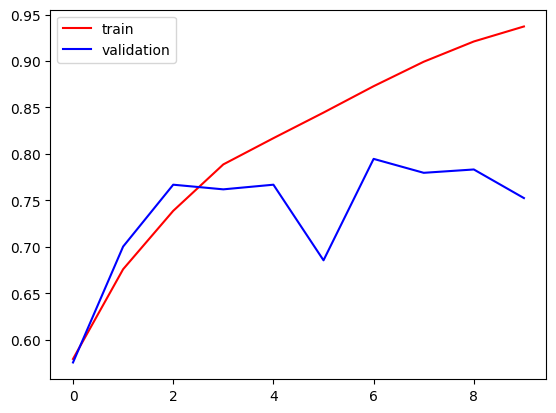

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/WhatsApp Image 2023-04-12 at 8.38.09 PM.jpeg')

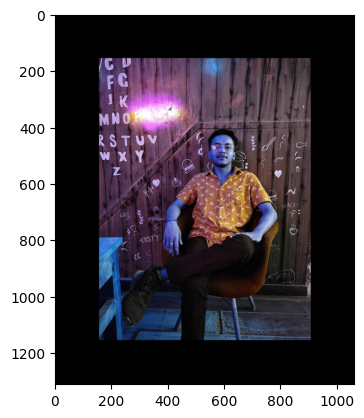

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1312, 1063, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
np.round(model.predict(test_input))

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)